This notebook assumes you are using sims_maf version >= 1.1, and have 'setup sims_maf' in your shell. 

It demonstrates calculating a metric at a series of time periods. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

Here, we'll look at computing the co-added depth in a single filter after year 1, 5, and 10

In [2]:
filterName = 'r'
years = [1.,5.,10.]
nights = np.array(years)*365.25
sqls = ['filter = "%s" and night < %f' %(filterName, night) for night in nights]
print sqls

['filter = "r" and night < 365.250000', 'filter = "r" and night < 1826.250000', 'filter = "r" and night < 3652.500000']


In [3]:
# Set up the database connection
opsdb = db.OpsimDatabase('enigma_1189_sqlite.db')
outDir = 'depths_test'
resultsDb = db.ResultsDb(outDir=outDir)

In [5]:
slicer = slicers.HealpixSlicer()
summaryMetrics = [metrics.MeanMetric(), metrics.MedianMetric()]
metric = metrics.Coaddm5Metric()
bgroupList = []
for year,sql in zip(years,sqls):
    bundle = metricBundles.MetricBundle(metric, slicer, sql, summaryMetrics=summaryMetrics)
    bundle.plotDict['label'] = '%i' % year
    bgroup = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroupList.append(bgroup)
    

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database with constraint filter = "r" and night < 365.250000
Found 37613 visits
Running:  [0]
Completed metric generation.

/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3738: SAWarning: Textual SQL expression 'filter = "r" and night < ...' should be explicitly declared as text('filter = "r" and night < ...') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
Optimal bin calculation tried to make 221 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting.
monopole: 25.436  dipole: lon: 5.9154, lat: -37.5629, amp: 0.676421
Plotting complete.
Querying database with constraint filter = "r" and night < 1826.250000
Found 271240 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting.
monopole: 26.8538  dipole: lon: 70.7624, lat: 65.6294, amp: 0.160873
Plotting complete.
Querying database with constraint filter = "r" and night < 3652.500000
Found 544710 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting.
monopole: 27.1372  dipole: lon: 82.546, lat: 26.7924, amp: 0.0524659
Plotting complete.


Optimal bin calculation tried to make 321 bins, returning 200


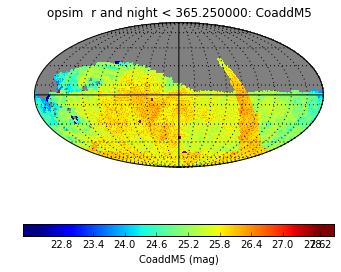

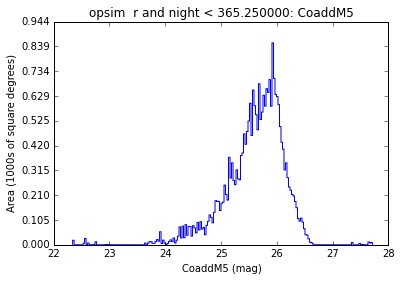

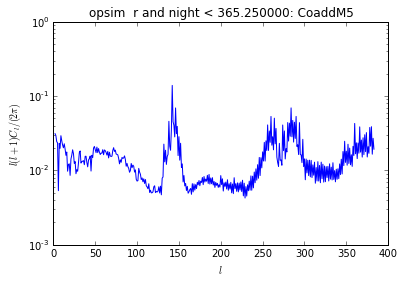

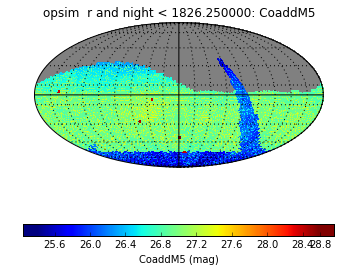

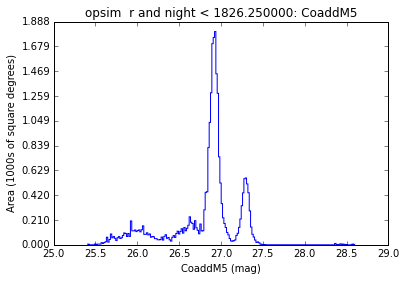

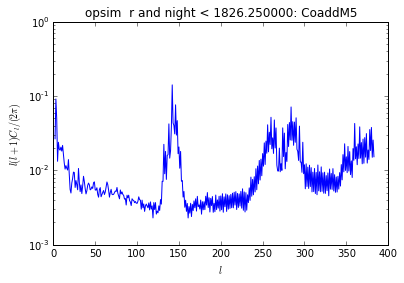

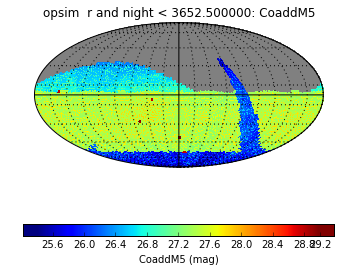

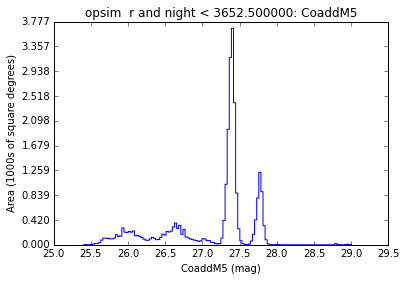

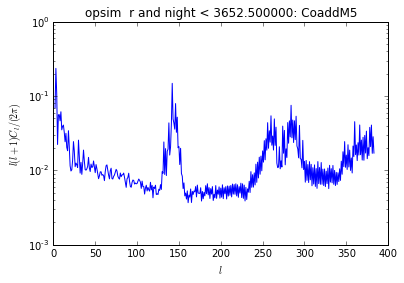

In [6]:
for bgroup in bgroupList:
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

In [7]:
print 'year, mean depth, median depth'
for year,bundleGroup in zip(years,bgroupList):
    print year, bundleGroup.bundleDict[0].summaryValues['Mean'], bundleGroup.bundleDict[0].summaryValues['Median']

year, mean depth, median depth
1.0 25.6029910909 25.6866229158
5.0 26.8083270125 26.9064529605
10.0 27.1331516681 27.3767963458


Let's do a zoom-in and gnomic project for all three

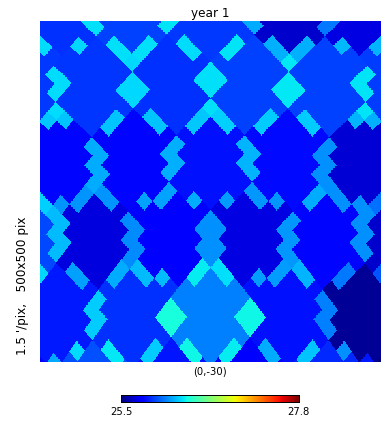

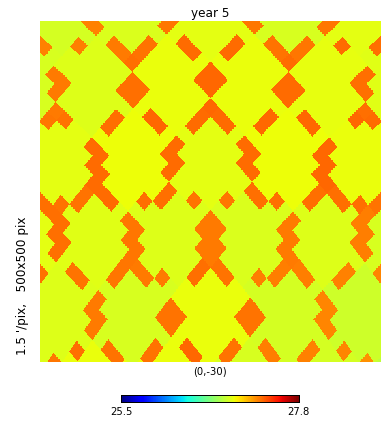

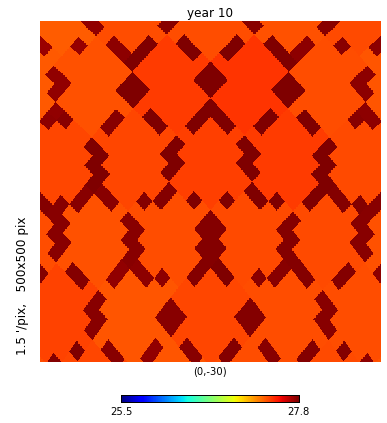

In [8]:
import healpy as hp
for year,bundleGroup in zip(years,bgroupList):
    hp.gnomview(bundleGroup.bundleDict[0].metricValues, rot=(0,-30), title='year %i'%year, 
                min=25.5, max=27.8, xsize=500,ysize=500)